# Airplane Severity Prediction 

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
# checking the Count of the Target Variable
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [5]:
df.set_index('Accident_ID',inplace=True)

In [6]:
# Encoding the Target Variable
df['Severity']=df['Severity'].replace({'Minor_Damage_And_Injuries':1,'Significant_Damage_And_Serious_Injuries': 3,'Significant_Damage_And_Fatalities':2,'Highly_Fatal_And_Damaging':0})

In [7]:
df['Severity'].value_counts()

0    3049
3    2729
1    2527
2    1695
Name: Severity, dtype: int64

In [8]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [9]:
# Checking null values
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7570 to 9387
Data columns (total 11 columns):
Severity                   10000 non-null int64
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
dtypes: float64(6), int64(5)
memory usage: 937.5 KB


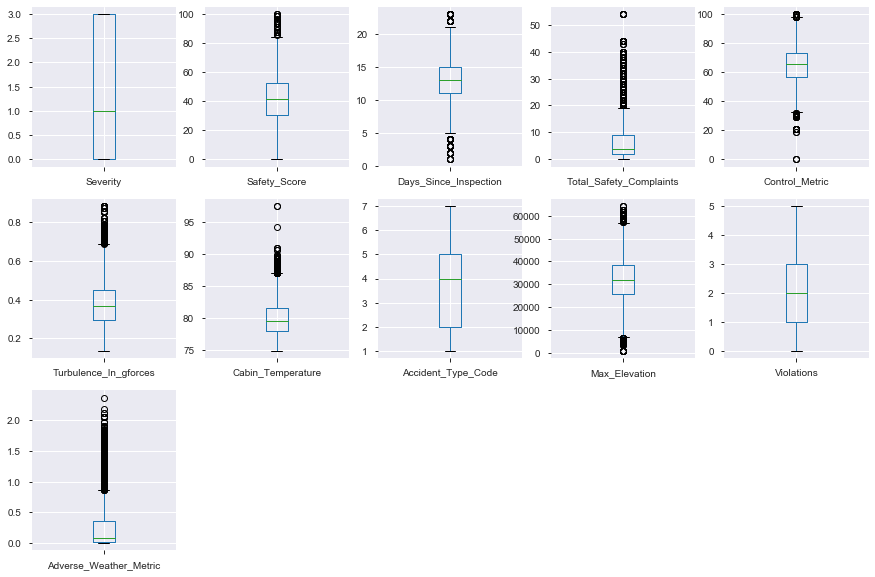

In [11]:
# CHecking Outliers
import matplotlib.pyplot as plt
df.plot(kind= 'box' , subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [12]:
#Removing Outliers using IQR:
q1 = df['Turbulence_In_gforces'].quantile(q=0.25)
q3 = df['Turbulence_In_gforces'].quantile(q=0.75)

IQR = q3-q1

UL = q3 + (1.5 * IQR)

LL = q1 - (1.5 * IQR)

df1 = df[(df['Turbulence_In_gforces']>LL) & (df['Turbulence_In_gforces']<UL)]

In [13]:
#Removing Outliers using IQR:
q1 = df1['Adverse_Weather_Metric'].quantile(q=0.25)
q3 = df1['Adverse_Weather_Metric'].quantile(q=0.75)

IQR = q3-q1

UL = q3 + (1.5 * IQR)

LL = q1 - (1.5 * IQR)

df2 = df1[(df1['Adverse_Weather_Metric']>LL) & (df1['Adverse_Weather_Metric']<UL)]

In [14]:
#Removing Outliers using IQR:
q1 = df1['Total_Safety_Complaints'].quantile(q=0.25)
q3 = df1['Total_Safety_Complaints'].quantile(q=0.75)

IQR = q3-q1

UL = q3 + (1.5 * IQR)

LL = q1 - (1.5 * IQR)

df2 = df1[(df1['Total_Safety_Complaints']>LL) & (df1['Total_Safety_Complaints']<UL)]

In [15]:
df2.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
10947,1,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505
4717,0,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872
8008,1,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419


In [20]:

print("checking the rows Without removing " , df.shape[0])
print("checking the rows Before removing " ,df1.shape[0])
print("checking the rows After removing " , df2.shape[0])

checking the rows Without removing  10000
checking the rows Before removing  9775
checking the rows After removing  9209


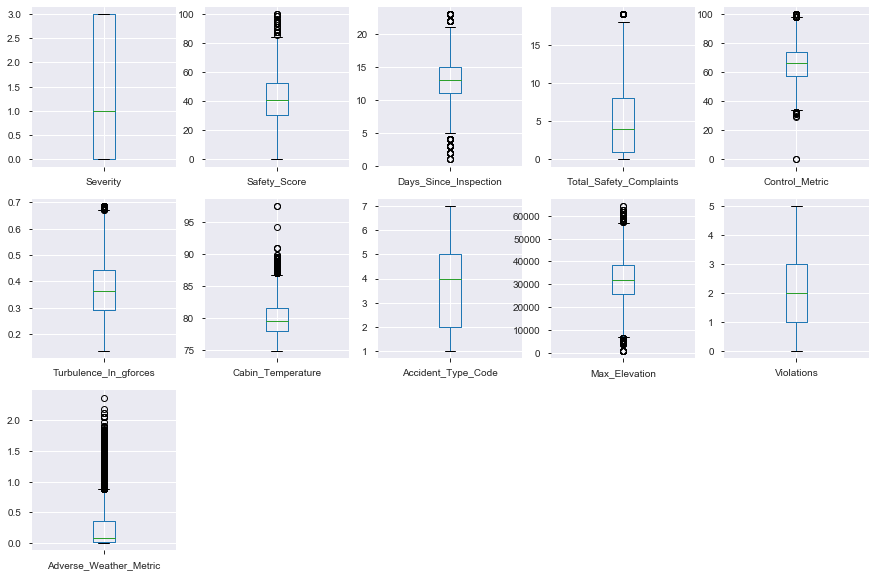

In [21]:
df2.plot(kind= 'box' , subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [143]:
#x1.plot(kind= 'box' , subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(15,10))
plt.show()

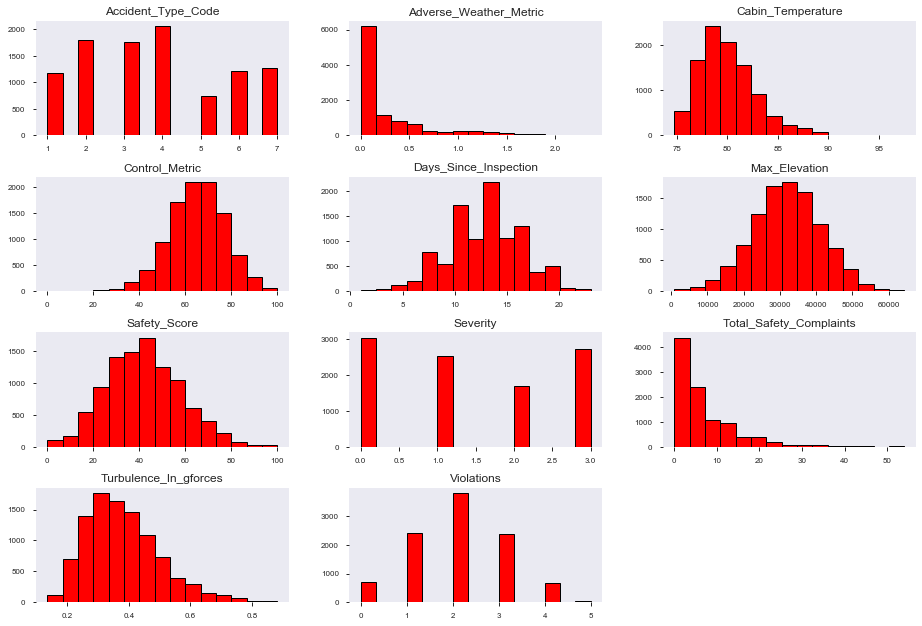

In [144]:
import matplotlib.pyplot as plt
df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.2, 2.2)) 

In [145]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [149]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


## Assigning X and Y

In [22]:
x=df.drop('Severity',1)

In [24]:
y=df['Severity']

In [26]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [28]:
# Fitting base modeland checking feature importance
gb=GradientBoostingClassifier(n_estimators=90,max_depth=6,learning_rate=.6)
rf=gb=RandomForestClassifier(n_estimators=100)

In [29]:
# fitting models
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
gb.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# Based on the feature Importance selecting the bellow features
gb.feature_importances_

array([0.28587888, 0.18434616, 0.03149621, 0.14245479, 0.05755513,
       0.04442374, 0.09406393, 0.04028006, 0.01582117, 0.10367993])

In [42]:
df_feature_imp=pd.DataFrame({'Feature':x.columns,'GBC':gb.feature_importances_*100,'RF':rf.feature_importances_*100})

In [43]:
#Checking the features from the df_feature_imp data frame
df_feature_imp

,Feature,GBC,RF
0,Safety_Score,28.587888,28.587888
1,Days_Since_Inspection,18.434616,18.434616
2,Total_Safety_Complaints,3.149621,3.149621
3,Control_Metric,14.245479,14.245479
4,Turbulence_In_gforces,5.755513,5.755513
5,Cabin_Temperature,4.442374,4.442374
6,Accident_Type_Code,9.406393,9.406393
7,Max_Elevation,4.028006,4.028006
8,Violations,1.582117,1.582117
9,Adverse_Weather_Metric,10.367993,10.367993


In [45]:
# Taking feature whose importance is > 9
df_feature_imp[df_feature_imp['GBC']>9]

,Feature,GBC,RF
0,Safety_Score,28.587888,28.587888
1,Days_Since_Inspection,18.434616,18.434616
3,Control_Metric,14.245479,14.245479
6,Accident_Type_Code,9.406393,9.406393
9,Adverse_Weather_Metric,10.367993,10.367993


In [46]:
# Taking the below feature for Training
x=x[['Safety_Score', 'Days_Since_Inspection', 'Control_Metric',
       'Accident_Type_Code']]

In [47]:
x.head()

,Safety_Score,Days_Since_Inspection,Control_Metric,Accident_Type_Code
Accident_ID,,,,
7570,49.223744,14,71.285324,2
12128,62.465753,10,72.288058,2
2181,63.059361,13,66.362808,7
5946,48.082192,11,74.703737,3
9054,26.484018,13,47.948952,3


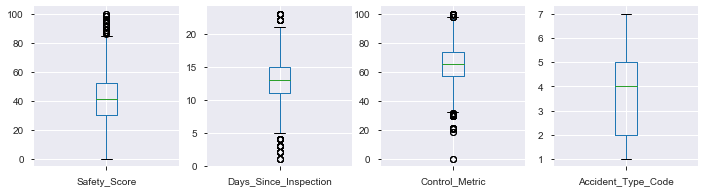

In [48]:
x.plot(kind= 'box' , subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [347]:
# Transforming X by sqrt 
x1=x.apply(lambda x:np.sqrt(x))

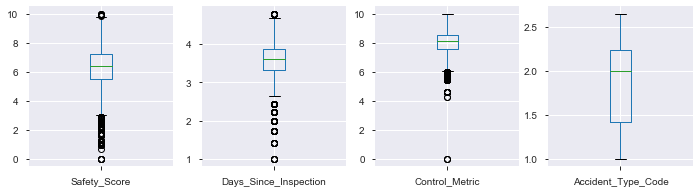

In [348]:
x1.plot(kind= 'box' , subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [259]:
x1.head()

,Safety_Score,Days_Since_Inspection,Control_Metric,Accident_Type_Code
Accident_ID,,,,
7570,7.015964,3.741657,8.443064,1.414214
12128,7.903528,3.162278,8.502238,1.414214
2181,7.940992,3.605551,8.146337,2.645751
5946,6.934132,3.316625,8.643132,1.732051
9054,5.146263,3.605551,6.924518,1.732051


# Training the model Using Pipeline

In [603]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier

from sklearn.model_selection import cross_val_score

pipe = Pipeline((
("scaler", StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pca",PCA(n_components=10)),

("gb1",GradientBoostingClassifier(n_estimators=350,max_depth=6,learning_rate=.6))
))
scoresdtpipe = cross_val_score(pipe,x1, y, cv=10,scoring='f1_macro')

print("After Avg Cross Val R2")
print(np.mean(scoresdtpipe))

After Avg Cross Val R2
0.9758629439393214


In [604]:
print("Final model R2 on test data after fitting only on train data")
pipe.fit(x,y)


Final model R2 on test data after fitting only on train data


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('rf',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.6, loss='deviance',
                                            max_depth=6, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=350,
                                            n_iter_no_change=None,
                  

In [ ]:
# Reading the Test Data

In [605]:
df_test=pd.read_csv('test.csv')

In [606]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [607]:
df_test.shape

(2500, 11)

In [608]:
df_test.set_index('Accident_ID',inplace=True)

In [609]:
x.shape

(10000, 4)

In [610]:
# Droping the features which are less important
df_test=df_test.drop(['Max_Elevation','Violations','Cabin_Temperature','Total_Safety_Complaints','Adverse_Weather_Metric','Turbulence_In_gforces'],1)

In [611]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Control_Metric,Accident_Type_Code
Accident_ID,,,,
1,19.497717,16,72.151322,4
10,58.173516,15,64.585232,7
14,33.287671,15,64.721969,6
17,3.287671,21,66.362808,3
21,10.867580,18,56.107566,2


In [612]:
df_test.shape

(2500, 4)

In [613]:
df2=pipe.predict(df_test)

In [ ]:
le1=LabelEncoder()

In [614]:
df1=pd.DataFrame(df2)

In [615]:
df1.head()

,0
0,0
1,2
2,3
3,3
4,2


In [617]:
df1['Accident_ID']=df_test.index

In [618]:
df1.set_index('Accident_ID',inplace=True)

In [619]:
df1[0].value_counts()

0    765
1    678
3    657
2    400
Name: 0, dtype: int64

In [620]:
# Un Coding the Target Variable for submission
dfs=df1.replace({1:'Minor_Damage_And_Injuries',3:'Significant_Damage_And_Serious_Injuries',2:'Significant_Damage_And_Fatalities',0:'Highly_Fatal_And_Damaging'})

In [621]:
dfs[0].value_counts()

Highly_Fatal_And_Damaging                  765
Minor_Damage_And_Injuries                  678
Significant_Damage_And_Serious_Injuries    657
Significant_Damage_And_Fatalities          400
Name: 0, dtype: int64

In [622]:
dfs.columns=['Severity']

In [623]:
dfs.head()

,Severity
Accident_ID,
1,Highly_Fatal_And_Damaging
10,Significant_Damage_And_Fatalities
14,Significant_Damage_And_Serious_Injuries
17,Significant_Damage_And_Serious_Injuries
21,Significant_Damage_And_Fatalities


In [624]:
# Writing the file to CSV fromat
dfs.to_csv('Predictionlast_15.csv')

In [418]:
#dfinal=pd.read_csv('Prediction49_8729.csv')